![title](UCN ICI.png)

 #  <font color='#7E9BC0'> AutoCorrelación y Pronóstico. </font>

<div class="alert alert-info"> </h4> **Material preparado para la carrera de Ingeniería Civil Industrial | Universidad Católica del Norte | Escuela de Ingeniería - Campus Coquimbo | Curso - Adminitración de la Producción 2.**
</h4> </div>

<div class="alert alert-block alert-warning">

<b> **Autor:**</b> 
Este material es una recopilacion de trabajos de clases y proyectos realizados por Sergio Correa Santis. Si necestita mayor información o quiere utilizar este material en forma parcial o total, solo debe utilizar la correspondiente referencia o contactar a **sergio.correa@ucn.cl**.  
</div>


## AutoCorrelación
Autocorrelación es la correlación que existe entre una variable retrasada uno o más periodos consigo misma.

| Periodo | $Y_t$ |$Y_{t-1}$|$Y_{t-2}$|
|---------|-------|---------|---------|
|   1     | 500   |         |         |
|   2     | 350   |  500    |         |
|   3     | 250   |  350    |  500    |
|   4     | 400   |  250    |  350    |

Los patrones de datos que incluyen componentes como tendencia y estacionalidad pueden estudiarse usando autocorrelaciones. Los patrones se identifican examinando los coeficientes de autocorrelación de una variable en diferentes retrasos de tiempo.

Para calcular el coeficiente de autocorrelación $r_k$ entre dos observaciones $Y_t$ y $Y_{t-k}$ que se encuentran a k periodos de distancia.

$r_k= \frac{\displaystyle\sum_{t=k+1}^{n}(Y_t-\bar{Y} )(Y_{t-k}-\bar{Y})}{\displaystyle\sum_{t=1}^{n}(Y_t-\bar{Y} )^2} \; \; k=0,1,2,...$

## Interpretando la AutoCorrelación

- Si una **serie es aleatoria**, las autocorrelaciones entre $Y_t$ y $Y_{t-k}$ para cualquier retraso de
tiempo **k son cercanas a cero**. **Los valores sucesivos de una serie de tiempo no están relacionados
entre sí.**


- Si una **serie muestra una tendencia, las observaciones sucesivas están altamente correlacionadas**
y es típico que **los coeficientes de correlación sean significativamente diferentes de cero**,
para los primeros retrasos de tiempo, y de forma gradual tienden a cero conforme se incrementa
el número de retrasos. El coeficiente de autocorrelación para un retraso de tiempo 1 a menudo
será muy grande (cercano a 1). También el coeficiente de autocorrelación para el retraso de
tiempo 2 será grande. Sin embargo, no será tan grande como para el retraso de tiempo 1.

- Si una **serie tiene un patrón estacional**, se presentará un coeficiente de autocorrelación significativo
en el retraso de tiempo estacional o en los múltiplos del retraso estacional. El retraso
estacional se considera de 4 para datos trimestrales y 12 para datos mensuales.

## Gráfica de Autocorrelación

**Un correlograma o función de autocorrelación es una gráfica de las autocorrelaciones para varios retrasos de una serie de tiempo.**

- **Si la serie es verdaderamente aleatoria**, casi todos los coeficientes de autocorrelación de la muestra deberían estar dentro de un rango especificado por cero, más o menos cierto número de errores estándar.

- **Si una serie muestra una tendencia, hay una relación significativa entre los valores sucesivos de
la serie de tiempo**. Los coeficientes de autocorrelación son usualmente grandes para varios de los primeros retrasos de tiempo y luego, conforme se incrementa el número de retrasos, caen gradualmente hacia cero 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import warnings
warnings.filterwarnings("ignore")

In [2]:
excel=pd.ExcelFile('data1.xlsx')
demanda =pd.read_excel(excel,'Sheet1')
demanda

,Año,Trimestre,Valor real
0,2000.0,1,500
1,NaN,2,350
2,NaN,3,250
3,NaN,4,400
4,2001.0,1,450
5,NaN,2,350
6,NaN,3,200
7,NaN,4,300
8,2002.0,1,350
9,NaN,2,200


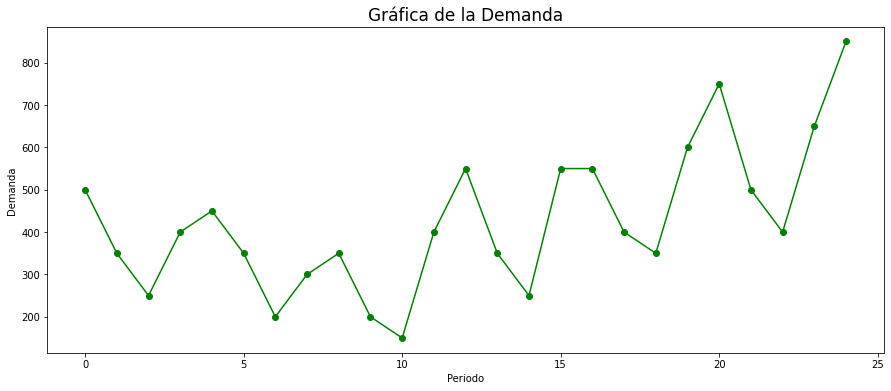

In [3]:
# Graficando la demanda
plt.figure(figsize=(15,6))
plt.plot(demanda.index,demanda['Valor real'],'go-',color='green')
plt.title("Gráfica de la Demanda", fontsize=17)
plt.xlabel('Periodo')
plt.ylabel('Demanda')

plt.show()

## Gráfica de Autocorrelaciones

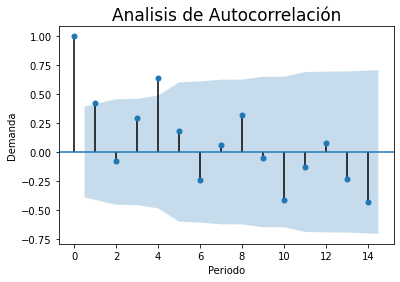

In [4]:
plot_acf(demanda['Valor real'])
plt.title("Analisis de Autocorrelación", fontsize=17)
plt.xlabel('Periodo')
plt.ylabel('Demanda')
plt.show()

**Se puede ver claramente que los datos tiene componente de tendencia, pero no se puede apreciar una estacionalidad clara**

## Revisión de Datos - Ejemplo

In [5]:
excel=pd.ExcelFile('data2.xlsx')
ejemplo =pd.read_excel(excel,'Demanda')
ejemplo.head()

,Año,Trimestre,Demanda
0,2013.0,1,500
1,NaN,2,350
2,NaN,3,250
3,NaN,4,400
4,2014.0,1,550


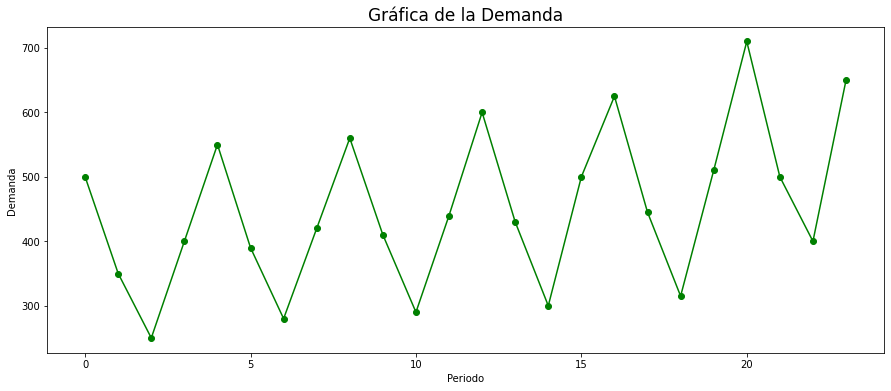

In [6]:
plt.figure(figsize=(15,6))
plt.plot(ejemplo.index,ejemplo['Demanda'],'go-',color='green')
plt.title("Gráfica de la Demanda", fontsize=17)
plt.xlabel('Periodo')
plt.ylabel('Demanda')

plt.show()

In [7]:
Media_ejemplo_4=ejemplo.rolling(4).mean()
Var_ejemplo_4=ejemplo.rolling(4).std()

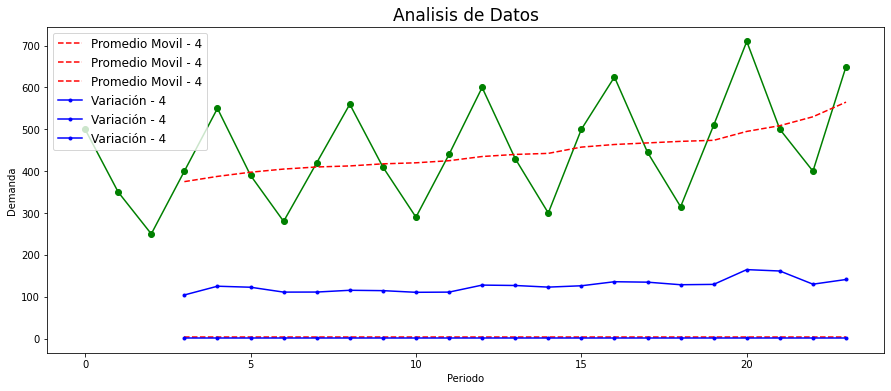

In [8]:
plt.figure(figsize=(15,6))

plt.plot(ejemplo.index,ejemplo['Demanda'],'go-',color='green')
plt.plot(Media_ejemplo_4.index,Media_ejemplo_4,'--',color='red',label='Promedio Movil - 4')
plt.plot(Var_ejemplo_4.index,Var_ejemplo_4,'.-',color='blue',label='Variación - 4')


plt.title("Analisis de Datos", fontsize=17)
plt.xlabel('Periodo')
plt.ylabel('Demanda')
plt.legend(fontsize=12)
plt.show()

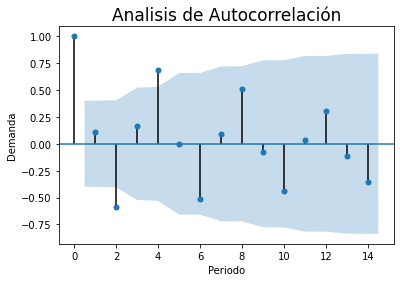

In [9]:
plot_acf(ejemplo['Demanda'])
plt.title("Analisis de Autocorrelación", fontsize=17)
plt.xlabel('Periodo')
plt.ylabel('Demanda')
plt.show()

**Se puede ver claramente que los datos tiene componente estacional de periodo 4 y tendencia.**